In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
## fixing random for lesson generation
np.random.seed(321)



In [2]:
## load data
fpath="https://docs.google.com/spreadsheets/d/e/2PACX-1vRHn-VvsM6-rRjBdkV-AhjPmVai2CrlCxpEYe8Mmtk1wsS5sGEft-5nJTk0V99Tw-hDLLgARISU5-d_/pub?output=csv"
df = pd.read_csv(fpath)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [3]:
## checking for null values
df.isna().sum()



mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

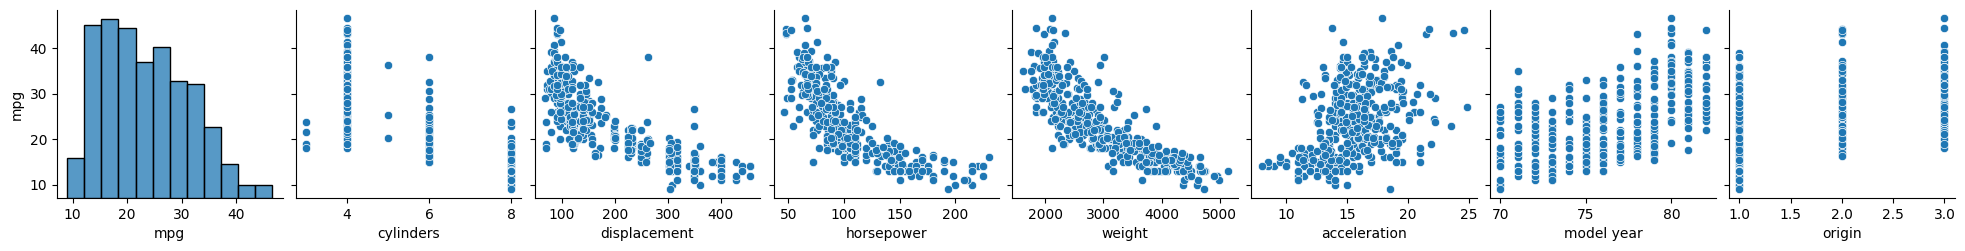

In [4]:
## Quick EDA for cols related to target
sns.pairplot(df,y_vars='mpg');



In [5]:
## convert origin to names
origin_map = {1:'NA', 2:'EU', 3:'AS'}
df['origin'] = df['origin'].replace(origin_map)
df['origin'].value_counts()



NA    245
AS     79
EU     68
Name: origin, dtype: int64

In [6]:
## Make x and y variables
y = df['mpg'].copy()
X = df.drop(columns=['mpg','car name']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()



cylinders  displacement  horsepower  weight  acceleration  model year  \
295          5         183.0          77    3530          20.1          79   
214          4          98.0          68    2045          18.5          77   
48           4         122.0          86    2220          14.0          71   
302          4          91.0          69    2130          14.7          79   
160          6         258.0         110    3730          19.0          75   

    origin  
295     EU  
214     AS  
48      NA  
302     EU  
160     NA

In [7]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols



['origin']

In [8]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols



['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year']

In [9]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')

